In [1]:
import sys
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(threshold=sys.maxsize)

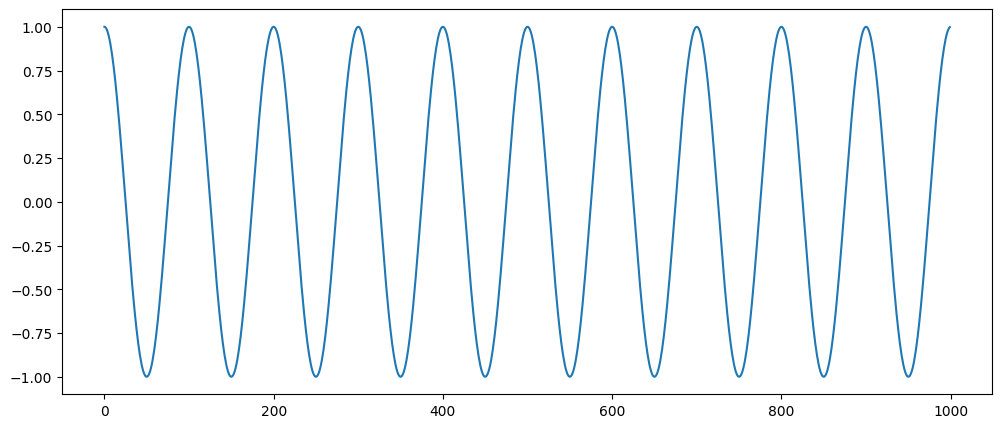

In [3]:
#matplotlib inline
plt.ion()
plt.show()
dataset = np.cos(np.arange(1000)*(20*np.pi/1000))[:,None]
x = np.arange(len(dataset))
plt.figure(figsize=(12,5))
plt.plot(x, dataset)
plt.title("")
plt.show()

In [4]:
# create a dataset
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    #print('dataX=', np.array(dataX))
    #print('dataY=', np.array(dataY))
    return np.array(dataX), np.array(dataY)

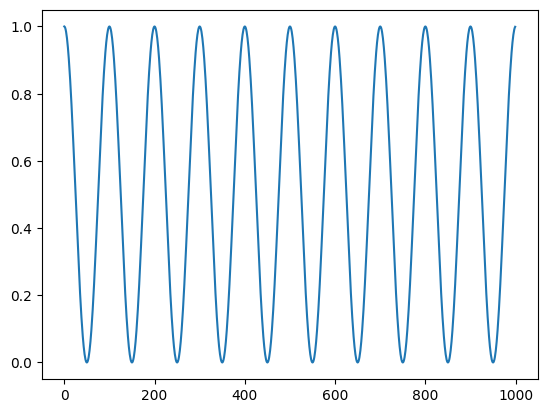

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
plt.plot(x, dataset)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [7]:
look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
print(len(trainX))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print(len(testX))

650
310


In [8]:
print('X-vector: ', trainX[0])
print('Y-label:', trainY[0])

X-vector:  [[1.        ]
 [0.99901336]
 [0.99605735]
 [0.99114363]
 [0.98429158]
 [0.97552826]
 [0.96488824]
 [0.95241353]
 [0.93815334]
 [0.92216396]
 [0.9045085 ]
 [0.88525662]
 [0.86448431]
 [0.84227355]
 [0.81871199]
 [0.79389263]
 [0.7679134 ]
 [0.74087684]
 [0.71288965]
 [0.68406228]]
Y-label: 0.6545084971874737


In [9]:
trainX = np.squeeze(trainX)
print(len(trainX))
testX = np.squeeze(testX)
print(len(testX))

650
310


In [10]:
print('X-vector: ', trainX[0])
print('Y-label:', trainY[0])
#print(trainX[-1])

X-vector:  [1.         0.99901336 0.99605735 0.99114363 0.98429158 0.97552826
 0.96488824 0.95241353 0.93815334 0.92216396 0.9045085  0.88525662
 0.86448431 0.84227355 0.81871199 0.79389263 0.7679134  0.74087684
 0.71288965 0.68406228]
Y-label: 0.6545084971874737


In [11]:
#defining the model
batch_size = 1
nr_of_layers = 2
model = Sequential()
model.add(Dense(32, input_dim=look_back, activation="relu"))
model.add(Dropout(0.3))
for i in range(nr_of_layers):
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                672       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [12]:
#training the model
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=1000, batch_size=32, verbose=0)

In [13]:
#evaluate the model
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=1)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX, testY, batch_size=batch_size, verbose=1)
print('Test Score: ', testScore)

650/650 [==============================] - 1s 1ms/step - loss: 0.0253 - accuracy: 0.0200
Train Score:  [0.025336485356092453, 0.019999999552965164]
310/310 - 0s - loss: 0.0291 - accuracy: 0.0194 - 340ms/epoch - 1ms/step
Test Score:  [0.029066922143101692, 0.019354838877916336]


In [14]:
#print(dataset[649:669]) # last training X vector
#print(dataset[669]) # last training y-value
print('last training X vector:', trainX[-1])
print('last training Y value:', trainY[-1])

last training X vector: [0.00098664 0.         0.00098664 0.00394265 0.00885637 0.01570842
 0.02447174 0.03511176 0.04758647 0.06184666 0.07783604 0.0954915
 0.11474338 0.13551569 0.15772645 0.18128801 0.20610737 0.2320866
 0.25912316 0.28711035]
last training Y value: 0.31593772365766043


In [15]:
print(dataset[670]) # the dataset is split into 2/3

[0.3454915]


In [16]:
#prediction
print(trainX[-1][1:])
print(len(trainX[-1][1:]))
trainY[-1]

[0.         0.00098664 0.00394265 0.00885637 0.01570842 0.02447174
 0.03511176 0.04758647 0.06184666 0.07783604 0.0954915  0.11474338
 0.13551569 0.15772645 0.18128801 0.20610737 0.2320866  0.25912316
 0.28711035]
19


0.31593772365766043

In [17]:
xval = np.hstack([trainX[-1][1:], trainY[-1]])
xval = xval.reshape(1, look_back)
yval = dataset[670]
print('xval:', xval)
print('yval:', yval) # actual value

xval: [[0.         0.00098664 0.00394265 0.00885637 0.01570842 0.02447174
  0.03511176 0.04758647 0.06184666 0.07783604 0.0954915  0.11474338
  0.13551569 0.15772645 0.18128801 0.20610737 0.2320866  0.25912316
  0.28711035 0.31593772]]
yval: [0.3454915]


In [18]:
prediction = model.predict(xval)
print('Model prediction:', prediction)
print('Actual Value:', testX[0][0])

1/1 [==============================] - 0s 120ms/step
Model prediction: [[0.3196101]]
Actual Value: 0.34549150281252716


In [19]:
look_ahead = 200
predictions = np.zeros((look_ahead,1))
print(predictions)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [20]:
for i in range(look_ahead):
    prediction = model.predict(xval, batch_size=32)
    print('prediction', prediction)
    predictions[i] = prediction
    #xval = np.hstack([xval[:,1:], prediction])
    new_data_point = np.array([[dataset[670 + i]]])  # Wrap the value in a 2D array
    new_data_point = new_data_point.reshape(1, 1)    # Reshape to (1, 1)
    xval = np.hstack([xval[:,1:], new_data_point])
    print('xval', xval)

1/1 [==============================] - 0s 21ms/step
prediction [[0.3196101]]
xval [[0.00098664 0.00394265 0.00885637 0.01570842 0.02447174 0.03511176
  0.04758647 0.06184666 0.07783604 0.0954915  0.11474338 0.13551569
  0.15772645 0.18128801 0.20610737 0.2320866  0.25912316 0.28711035
  0.31593772 0.3454915 ]]
1/1 [==============================] - 0s 21ms/step
prediction [[0.3604822]]
xval [[0.00394265 0.00885637 0.01570842 0.02447174 0.03511176 0.04758647
  0.06184666 0.07783604 0.0954915  0.11474338 0.13551569 0.15772645
  0.18128801 0.20610737 0.2320866  0.25912316 0.28711035 0.31593772
  0.3454915  0.37565506]]
1/1 [==============================] - 0s 23ms/step
prediction [[0.3998808]]
xval [[0.00885637 0.01570842 0.02447174 0.03511176 0.04758647 0.06184666
  0.07783604 0.0954915  0.11474338 0.13551569 0.15772645 0.18128801
  0.20610737 0.2320866  0.25912316 0.28711035 0.31593772 0.3454915
  0.37565506 0.40630934]]
1/1 [==============================] - 0s 19ms/step
prediction [[

1/1 [==============================] - 0s 29ms/step
prediction [[0.6863657]]
xval [[0.59369066 0.62434494 0.6545085  0.68406228 0.71288965 0.74087684
  0.7679134  0.79389263 0.81871199 0.84227355 0.86448431 0.88525662
  0.9045085  0.92216396 0.93815334 0.95241353 0.96488824 0.97552826
  0.98429158 0.99114363]]
1/1 [==============================] - 0s 20ms/step
prediction [[0.6886457]]
xval [[0.62434494 0.6545085  0.68406228 0.71288965 0.74087684 0.7679134
  0.79389263 0.81871199 0.84227355 0.86448431 0.88525662 0.9045085
  0.92216396 0.93815334 0.95241353 0.96488824 0.97552826 0.98429158
  0.99114363 0.99605735]]
1/1 [==============================] - 0s 17ms/step
prediction [[0.6899811]]
xval [[0.6545085  0.68406228 0.71288965 0.74087684 0.7679134  0.79389263
  0.81871199 0.84227355 0.86448431 0.88525662 0.9045085  0.92216396
  0.93815334 0.95241353 0.96488824 0.97552826 0.98429158 0.99114363
  0.99605735 0.99901336]]
1/1 [==============================] - 0s 22ms/step
prediction [[0

1/1 [==============================] - 0s 23ms/step
prediction [[0.46230367]]
xval [[0.97552826 0.96488824 0.95241353 0.93815334 0.92216396 0.9045085
  0.88525662 0.86448431 0.84227355 0.81871199 0.79389263 0.7679134
  0.74087684 0.71288965 0.68406228 0.6545085  0.62434494 0.59369066
  0.56266662 0.53139526]]
1/1 [==============================] - 0s 19ms/step
prediction [[0.44888157]]
xval [[0.96488824 0.95241353 0.93815334 0.92216396 0.9045085  0.88525662
  0.86448431 0.84227355 0.81871199 0.79389263 0.7679134  0.74087684
  0.71288965 0.68406228 0.6545085  0.62434494 0.59369066 0.56266662
  0.53139526 0.5       ]]
1/1 [==============================] - 0s 15ms/step
prediction [[0.43584886]]
xval [[0.95241353 0.93815334 0.92216396 0.9045085  0.88525662 0.86448431
  0.84227355 0.81871199 0.79389263 0.7679134  0.74087684 0.71288965
  0.68406228 0.6545085  0.62434494 0.59369066 0.56266662 0.53139526
  0.5        0.46860474]]
1/1 [==============================] - 0s 20ms/step
prediction 

1/1 [==============================] - 0s 16ms/step
prediction [[0.07608971]]
xval [[0.28711035 0.25912316 0.2320866  0.20610737 0.18128801 0.15772645
  0.13551569 0.11474338 0.0954915  0.07783604 0.06184666 0.04758647
  0.03511176 0.02447174 0.01570842 0.00885637 0.00394265 0.00098664
  0.         0.00098664]]
1/1 [==============================] - 0s 20ms/step
prediction [[0.07725826]]
xval [[0.25912316 0.2320866  0.20610737 0.18128801 0.15772645 0.13551569
  0.11474338 0.0954915  0.07783604 0.06184666 0.04758647 0.03511176
  0.02447174 0.01570842 0.00885637 0.00394265 0.00098664 0.
  0.00098664 0.00394265]]
1/1 [==============================] - 0s 28ms/step
prediction [[0.07902855]]
xval [[0.2320866  0.20610737 0.18128801 0.15772645 0.13551569 0.11474338
  0.0954915  0.07783604 0.06184666 0.04758647 0.03511176 0.02447174
  0.01570842 0.00885637 0.00394265 0.00098664 0.         0.00098664
  0.00394265 0.00885637]]
1/1 [==============================] - 0s 25ms/step
prediction [[0.08

1/1 [==============================] - 0s 21ms/step
prediction [[0.49598193]]
xval [[0.07783604 0.0954915  0.11474338 0.13551569 0.15772645 0.18128801
  0.20610737 0.2320866  0.25912316 0.28711035 0.31593772 0.3454915
  0.37565506 0.40630934 0.43733338 0.46860474 0.5        0.53139526
  0.56266662 0.59369066]]
1/1 [==============================] - 0s 25ms/step
prediction [[0.51062465]]
xval [[0.0954915  0.11474338 0.13551569 0.15772645 0.18128801 0.20610737
  0.2320866  0.25912316 0.28711035 0.31593772 0.3454915  0.37565506
  0.40630934 0.43733338 0.46860474 0.5        0.53139526 0.56266662
  0.59369066 0.62434494]]
1/1 [==============================] - 0s 21ms/step
prediction [[0.52514386]]
xval [[0.11474338 0.13551569 0.15772645 0.18128801 0.20610737 0.2320866
  0.25912316 0.28711035 0.31593772 0.3454915  0.37565506 0.40630934
  0.43733338 0.46860474 0.5        0.53139526 0.56266662 0.59369066
  0.62434494 0.6545085 ]]
1/1 [==============================] - 0s 26ms/step
prediction 

1/1 [==============================] - 0s 22ms/step
prediction [[0.6781219]]
xval [[0.81871199 0.84227355 0.86448431 0.88525662 0.9045085  0.92216396
  0.93815334 0.95241353 0.96488824 0.97552826 0.98429158 0.99114363
  0.99605735 0.99901336 1.         0.99901336 0.99605735 0.99114363
  0.98429158 0.97552826]]
1/1 [==============================] - 0s 20ms/step
prediction [[0.6729064]]
xval [[0.84227355 0.86448431 0.88525662 0.9045085  0.92216396 0.93815334
  0.95241353 0.96488824 0.97552826 0.98429158 0.99114363 0.99605735
  0.99901336 1.         0.99901336 0.99605735 0.99114363 0.98429158
  0.97552826 0.96488824]]
1/1 [==============================] - 0s 17ms/step
prediction [[0.66680837]]
xval [[0.86448431 0.88525662 0.9045085  0.92216396 0.93815334 0.95241353
  0.96488824 0.97552826 0.98429158 0.99114363 0.99605735 0.99901336
  1.         0.99901336 0.99605735 0.99114363 0.98429158 0.97552826
  0.96488824 0.95241353]]
1/1 [==============================] - 0s 21ms/step
prediction 

1/1 [==============================] - 0s 20ms/step
prediction [[0.2556951]]
xval [[0.84227355 0.81871199 0.79389263 0.7679134  0.74087684 0.71288965
  0.68406228 0.6545085  0.62434494 0.59369066 0.56266662 0.53139526
  0.5        0.46860474 0.43733338 0.40630934 0.37565506 0.3454915
  0.31593772 0.28711035]]
1/1 [==============================] - 0s 19ms/step
prediction [[0.22991176]]
xval [[0.81871199 0.79389263 0.7679134  0.74087684 0.71288965 0.68406228
  0.6545085  0.62434494 0.59369066 0.56266662 0.53139526 0.5
  0.46860474 0.43733338 0.40630934 0.37565506 0.3454915  0.31593772
  0.28711035 0.25912316]]
1/1 [==============================] - 0s 20ms/step
prediction [[0.19788483]]
xval [[0.79389263 0.7679134  0.74087684 0.71288965 0.68406228 0.6545085
  0.62434494 0.59369066 0.56266662 0.53139526 0.5        0.46860474
  0.43733338 0.40630934 0.37565506 0.3454915  0.31593772 0.28711035
  0.25912316 0.2320866 ]]
1/1 [==============================] - 0s 28ms/step
prediction [[0.1733

1/1 [==============================] - 0s 20ms/step
prediction [[0.09790356]]
xval [[0.0954915  0.07783604 0.06184666 0.04758647 0.03511176 0.02447174
  0.01570842 0.00885637 0.00394265 0.00098664 0.         0.00098664
  0.00394265 0.00885637 0.01570842 0.02447174 0.03511176 0.04758647
  0.06184666 0.07783604]]
1/1 [==============================] - 0s 20ms/step
prediction [[0.10612181]]
xval [[0.07783604 0.06184666 0.04758647 0.03511176 0.02447174 0.01570842
  0.00885637 0.00394265 0.00098664 0.         0.00098664 0.00394265
  0.00885637 0.01570842 0.02447174 0.03511176 0.04758647 0.06184666
  0.07783604 0.0954915 ]]
1/1 [==============================] - 0s 20ms/step
prediction [[0.11952449]]
xval [[0.06184666 0.04758647 0.03511176 0.02447174 0.01570842 0.00885637
  0.00394265 0.00098664 0.         0.00098664 0.00394265 0.00885637
  0.01570842 0.02447174 0.03511176 0.04758647 0.06184666 0.07783604
  0.0954915  0.11474338]]
1/1 [==============================] - 0s 21ms/step
predictio

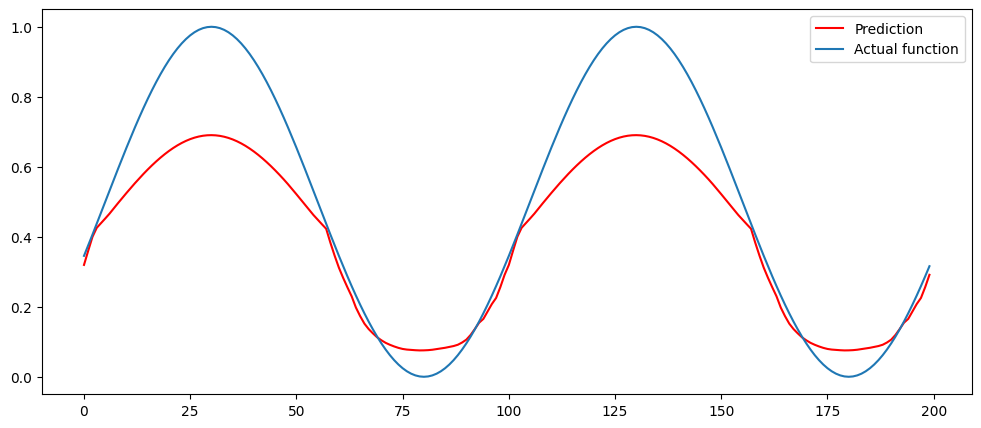

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="Prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="Actual function")
plt.legend()
plt.show()
plt.draw()